Actividad 5: Uso de software para búsqueda

Nombre: Debanny Michelle Martínez García

Matricula: 2022210

Inteligencia Artificial y Redes Neuronales

Hora: N4

Dia: L, M y V

In [1]:
#Librerias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Conjunto de datos
(train_data, train_label), (test_data, test_label) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_data, test_data = train_data / 255.0, test_data / 255.0

11490434/11490434 [==============================] - 0s 0us/step


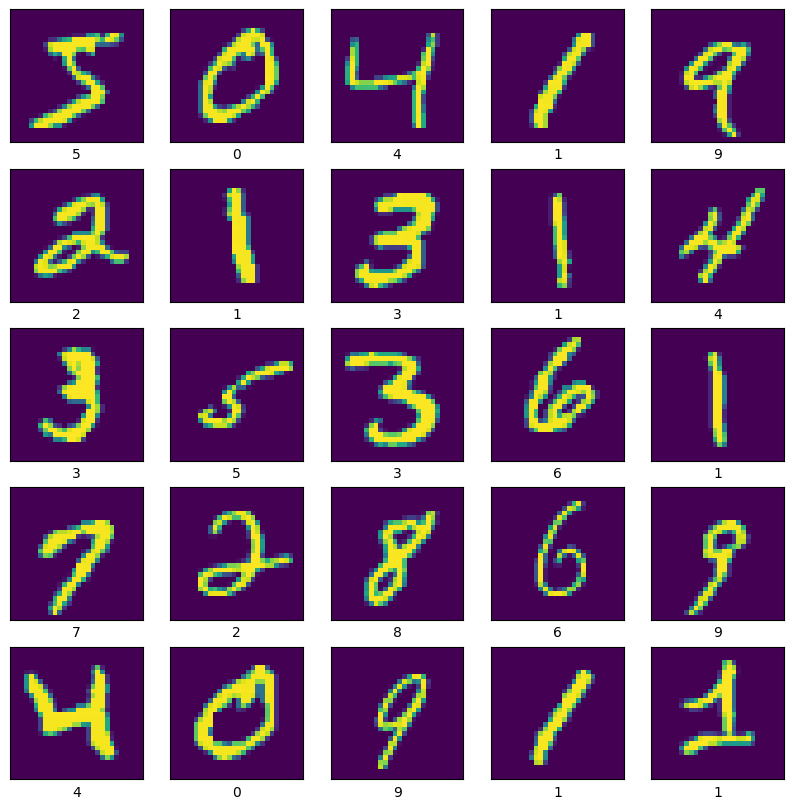

In [3]:
#Verificación de datos
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i])
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [4]:
#Imagenes de entrenamiento
train_data.shape

(60000, 28, 28)

In [5]:
#Imagenes de prueba
test_data.shape

(10000, 28, 28)

In [6]:
#Configurar capas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
#Entrenar el modelo
history = model.fit(train_data, train_label, epochs=10, validation_data=(test_data, test_label))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2575 - accuracy: 0.9266 - val_loss: 0.1400 - val_accuracy: 0.9594
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1142 - accuracy: 0.9661 - val_loss: 0.1043 - val_accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0793 - accuracy: 0.9760 - val_loss: 0.0871 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0580 - accuracy: 0.9826 - val_loss: 0.0770 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0765 - val_accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0708 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0785 - val_accuracy:

In [9]:
#Evaluar Exactitud
test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0896 - accuracy: 0.9761 - 733ms/epoch - 2ms/step

Test accuracy: 0.9761000275611877


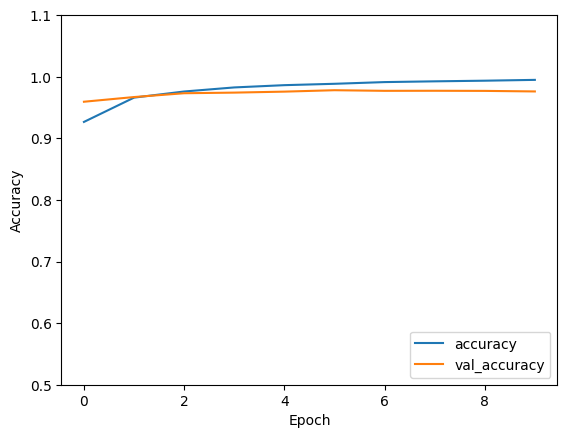

In [10]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

In [11]:
#Predicciones
predictions = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [12]:
predictions[0]

array([9.5268982e-10, 3.9146495e-11, 9.3824980e-08, 6.6267762e-06,
       5.2683086e-15, 3.9619447e-10, 6.6455982e-17, 9.9999291e-01,
       3.5350875e-11, 2.5457911e-07], dtype=float32)

In [13]:
np.argmax(predictions[0])

7

In [14]:
test_label[0]

7

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

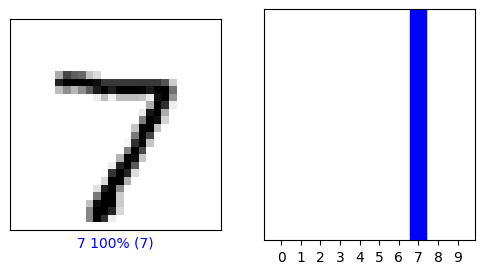

In [16]:
#Predicción 1
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

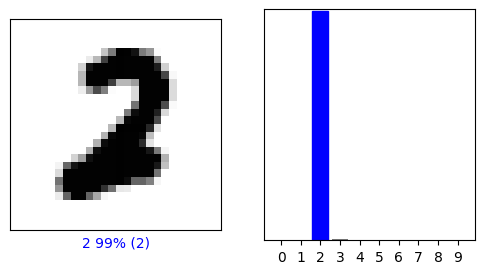

In [21]:
#Predicción 2
i = 199
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

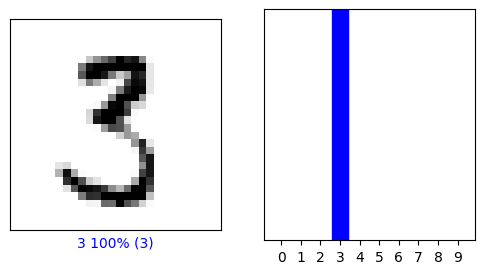

In [22]:
#Predicción 3
i = 1997
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

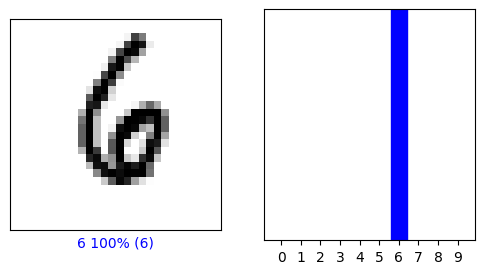

In [23]:
#Predicción 4
i = 4926
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

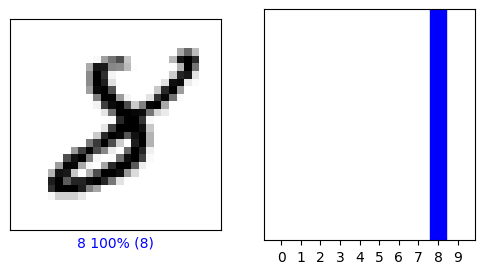

In [30]:
#Predicción 5
i = 9926
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

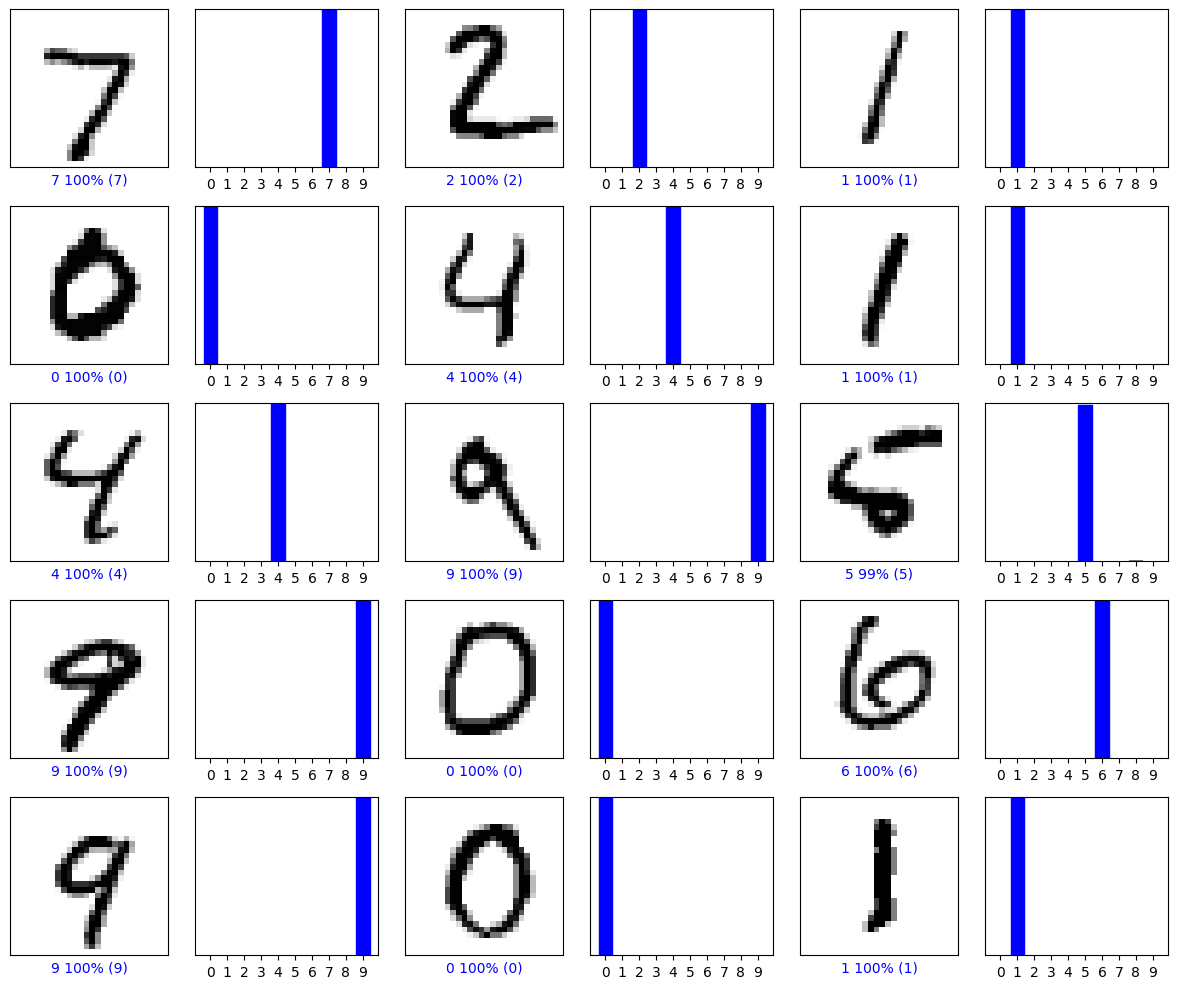

In [32]:
#Conjunto de predicciones
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()